# New Section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', 40)
sns.set_theme(style="whitegrid", palette="deep")

# Load the data
DATA_PATH = "/content/dv3.csv"
df = pd.read_csv(DATA_PATH)

target = "HbA1c3"
print(f"Shape  : {df.shape}")
df.head()


Shape  : (67, 35)


,AGE,GENDER,DURATION DM,INSULIN REGIMEN,DDS1,FVG1,HbA1c1,Date1,Gap from initial visit (days),FVG2,HbA1c2,Reduction A,Date2,Gap from first clinical visit (days),DDS3,FVG3,HbA1c3,Freq Hypo,Freq of Visits,Reduction (%),eGFR,CKD Stage,Group,HbA1c_Delta_1_2,FVG_Delta_1_2,DDS_Trend_1_3,Avg_FVG_1_2,HbA1c_per_day_change,eGFR_stage_code,eGFR_stage_label,Visit_Interval_Ratio,ReductionA_per_day,Hypo_per_visit,Insulin_Regimen_Type,HbA1c_change_rate_v1_v2
0,42,FEMALE,15,PBD,2.59,7.9,9.1,9/10/2020,91,10.1,8.3,9.6,12/1/2020,82,1.18,11.2,9.4,2,5,-3.3,152.40,1,CONTROL,-0.8,2.2,-1.41,9.00,-0.008791,1,Stage 1 - Normal/High,0.473988,0.117073,0.400000,1,-0.008791
1,40,MALE,8,BB,3.35,5.1,9.3,10/8/2020,98,3.0,7.6,22.4,1/7/2021,91,3.18,4.9,6.7,4,6,28.0,117.10,1,CONTROL,-1.7,-2.1,-0.17,4.05,-0.017347,1,Stage 1 - Normal/High,0.481481,0.246154,0.666667,0,-0.017347
2,28,MALE,7,PBD,2.76,21.5,12.1,8/25/2020,84,6.6,9.3,30.1,11/17/2020,84,2.18,13.6,11.6,0,5,4.1,123.70,1,CONTROL,-2.8,-14.9,-0.58,14.05,-0.033333,1,Stage 1 - Normal/High,0.500000,0.358333,0.000000,1,-0.033333
3,32,MALE,13,PBD,2.59,9.1,8.3,8/26/2020,83,7.8,9.3,-10.8,11/18/2020,84,2.24,4.4,9.1,0,5,-9.6,38.49,3b,CONTROL,1.0,-1.3,-0.35,8.45,0.012048,4,Stage 3b - Moderate to severe,0.502994,-0.128571,0.000000,1,0.012048
4,49,FEMALE,18,BB,1.41,15.3,9.4,9/10/2020,91,12.6,7.3,28.8,12/4/2020,85,1.00,6.3,7.0,0,5,25.5,147.90,1,CONTROL,-2.1,-2.7,-0.41,13.95,-0.023077,1,Stage 1 - Normal/High,0.482955,0.338824,0.000000,0,-0.023077


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   AGE                                   67 non-null     int64  
 1   GENDER                                67 non-null     object 
 2   DURATION DM                           67 non-null     int64  
 3   INSULIN REGIMEN                       67 non-null     object 
 4   DDS1                                  67 non-null     float64
 5   FVG1                                  67 non-null     float64
 6   HbA1c1                                67 non-null     float64
 7   Date1                                 67 non-null     object 
 8   Gap from initial visit (days)         67 non-null     int64  
 9   FVG2                                  67 non-null     float64
 10  HbA1c2                                67 non-null     float64
 11  Reduction A          

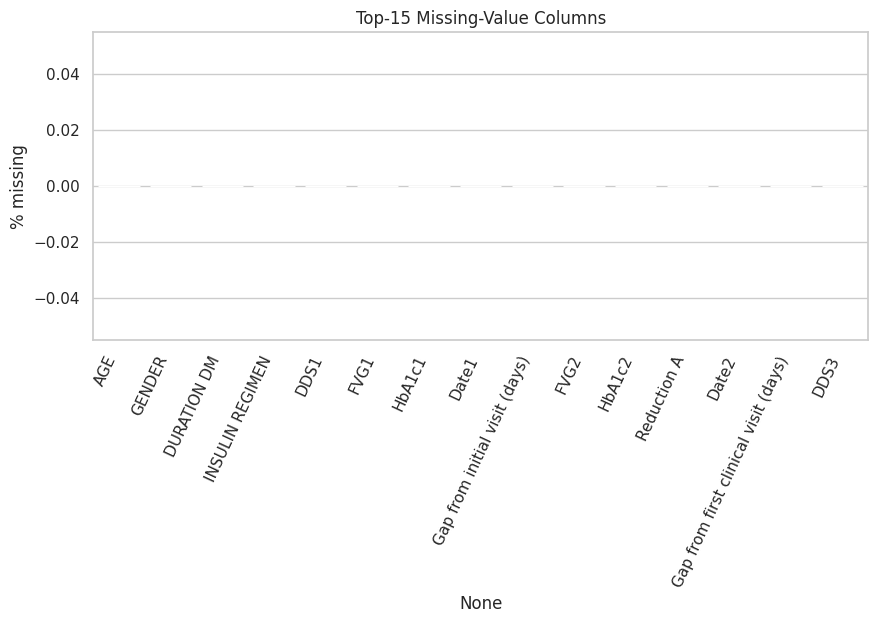

In [3]:
#check for missing values
na_pct = df.isna().mean().mul(100).sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=na_pct.head(15).index, y=na_pct.head(15).values)
plt.xticks(rotation=65, ha='right'); plt.ylabel('% missing'); plt.title('Top-15 Missing-Value Columns');


In [4]:
#Descriptive statistics of numeric features
num_desc = df.describe().T
display(num_desc.style.background_gradient(cmap="Blues"))

,count,mean,std,min,25%,50%,75%,max
AGE,67.000000,42.656716,9.700909,21.000000,36.500000,42.000000,48.000000,66.000000
DURATION DM,67.000000,11.582090,5.627716,2.000000,6.500000,11.000000,15.500000,26.000000
DDS1,67.000000,2.687761,0.932551,1.060000,2.060000,2.590000,3.180000,5.290000
FVG1,67.000000,10.838806,4.252377,3.600000,7.900000,10.100000,13.900000,21.500000
HbA1c1,67.000000,9.700000,1.393383,8.000000,8.650000,9.400000,10.550000,14.000000
Gap from initial visit (days),67.000000,94.089552,6.721137,77.000000,91.000000,95.000000,98.000000,112.000000
FVG2,67.000000,7.894030,2.602439,3.000000,5.950000,7.600000,9.750000,16.000000
HbA1c2,67.000000,8.070149,1.141638,5.600000,7.150000,8.200000,8.800000,11.200000
Reduction A,67.000000,21.946269,22.103039,-10.800000,8.850000,16.700000,29.450000,112.100000
Gap from first clinical visit (days),67.000000,86.731343,9.069733,70.000000,83.000000,84.000000,91.000000,113.000000


Text(0.5, 1.0, 'Boxplot (Outlier Check)')

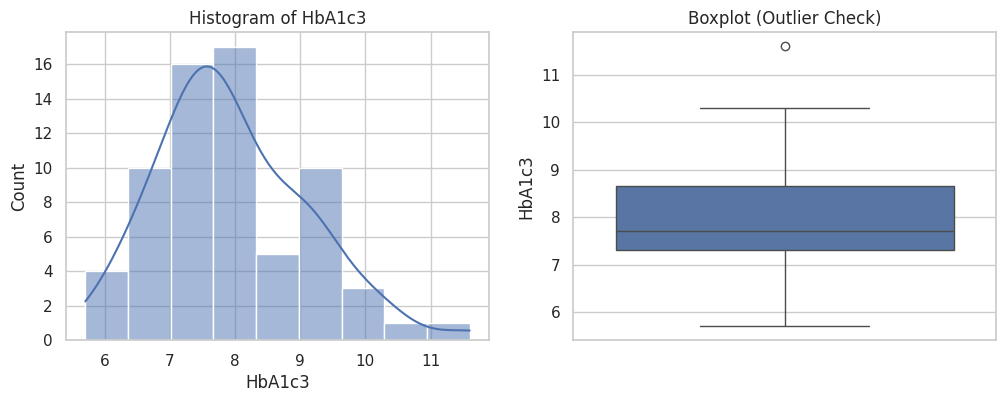

In [5]:
#Distribution & outliers of HbA1c3
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(df[target].dropna(), kde=True, ax=ax[0])
ax[0].set_title("Histogram of HbA1c3")

sns.boxplot(y=df[target], ax=ax[1])
ax[1].set_title("Boxplot (Outlier Check)")


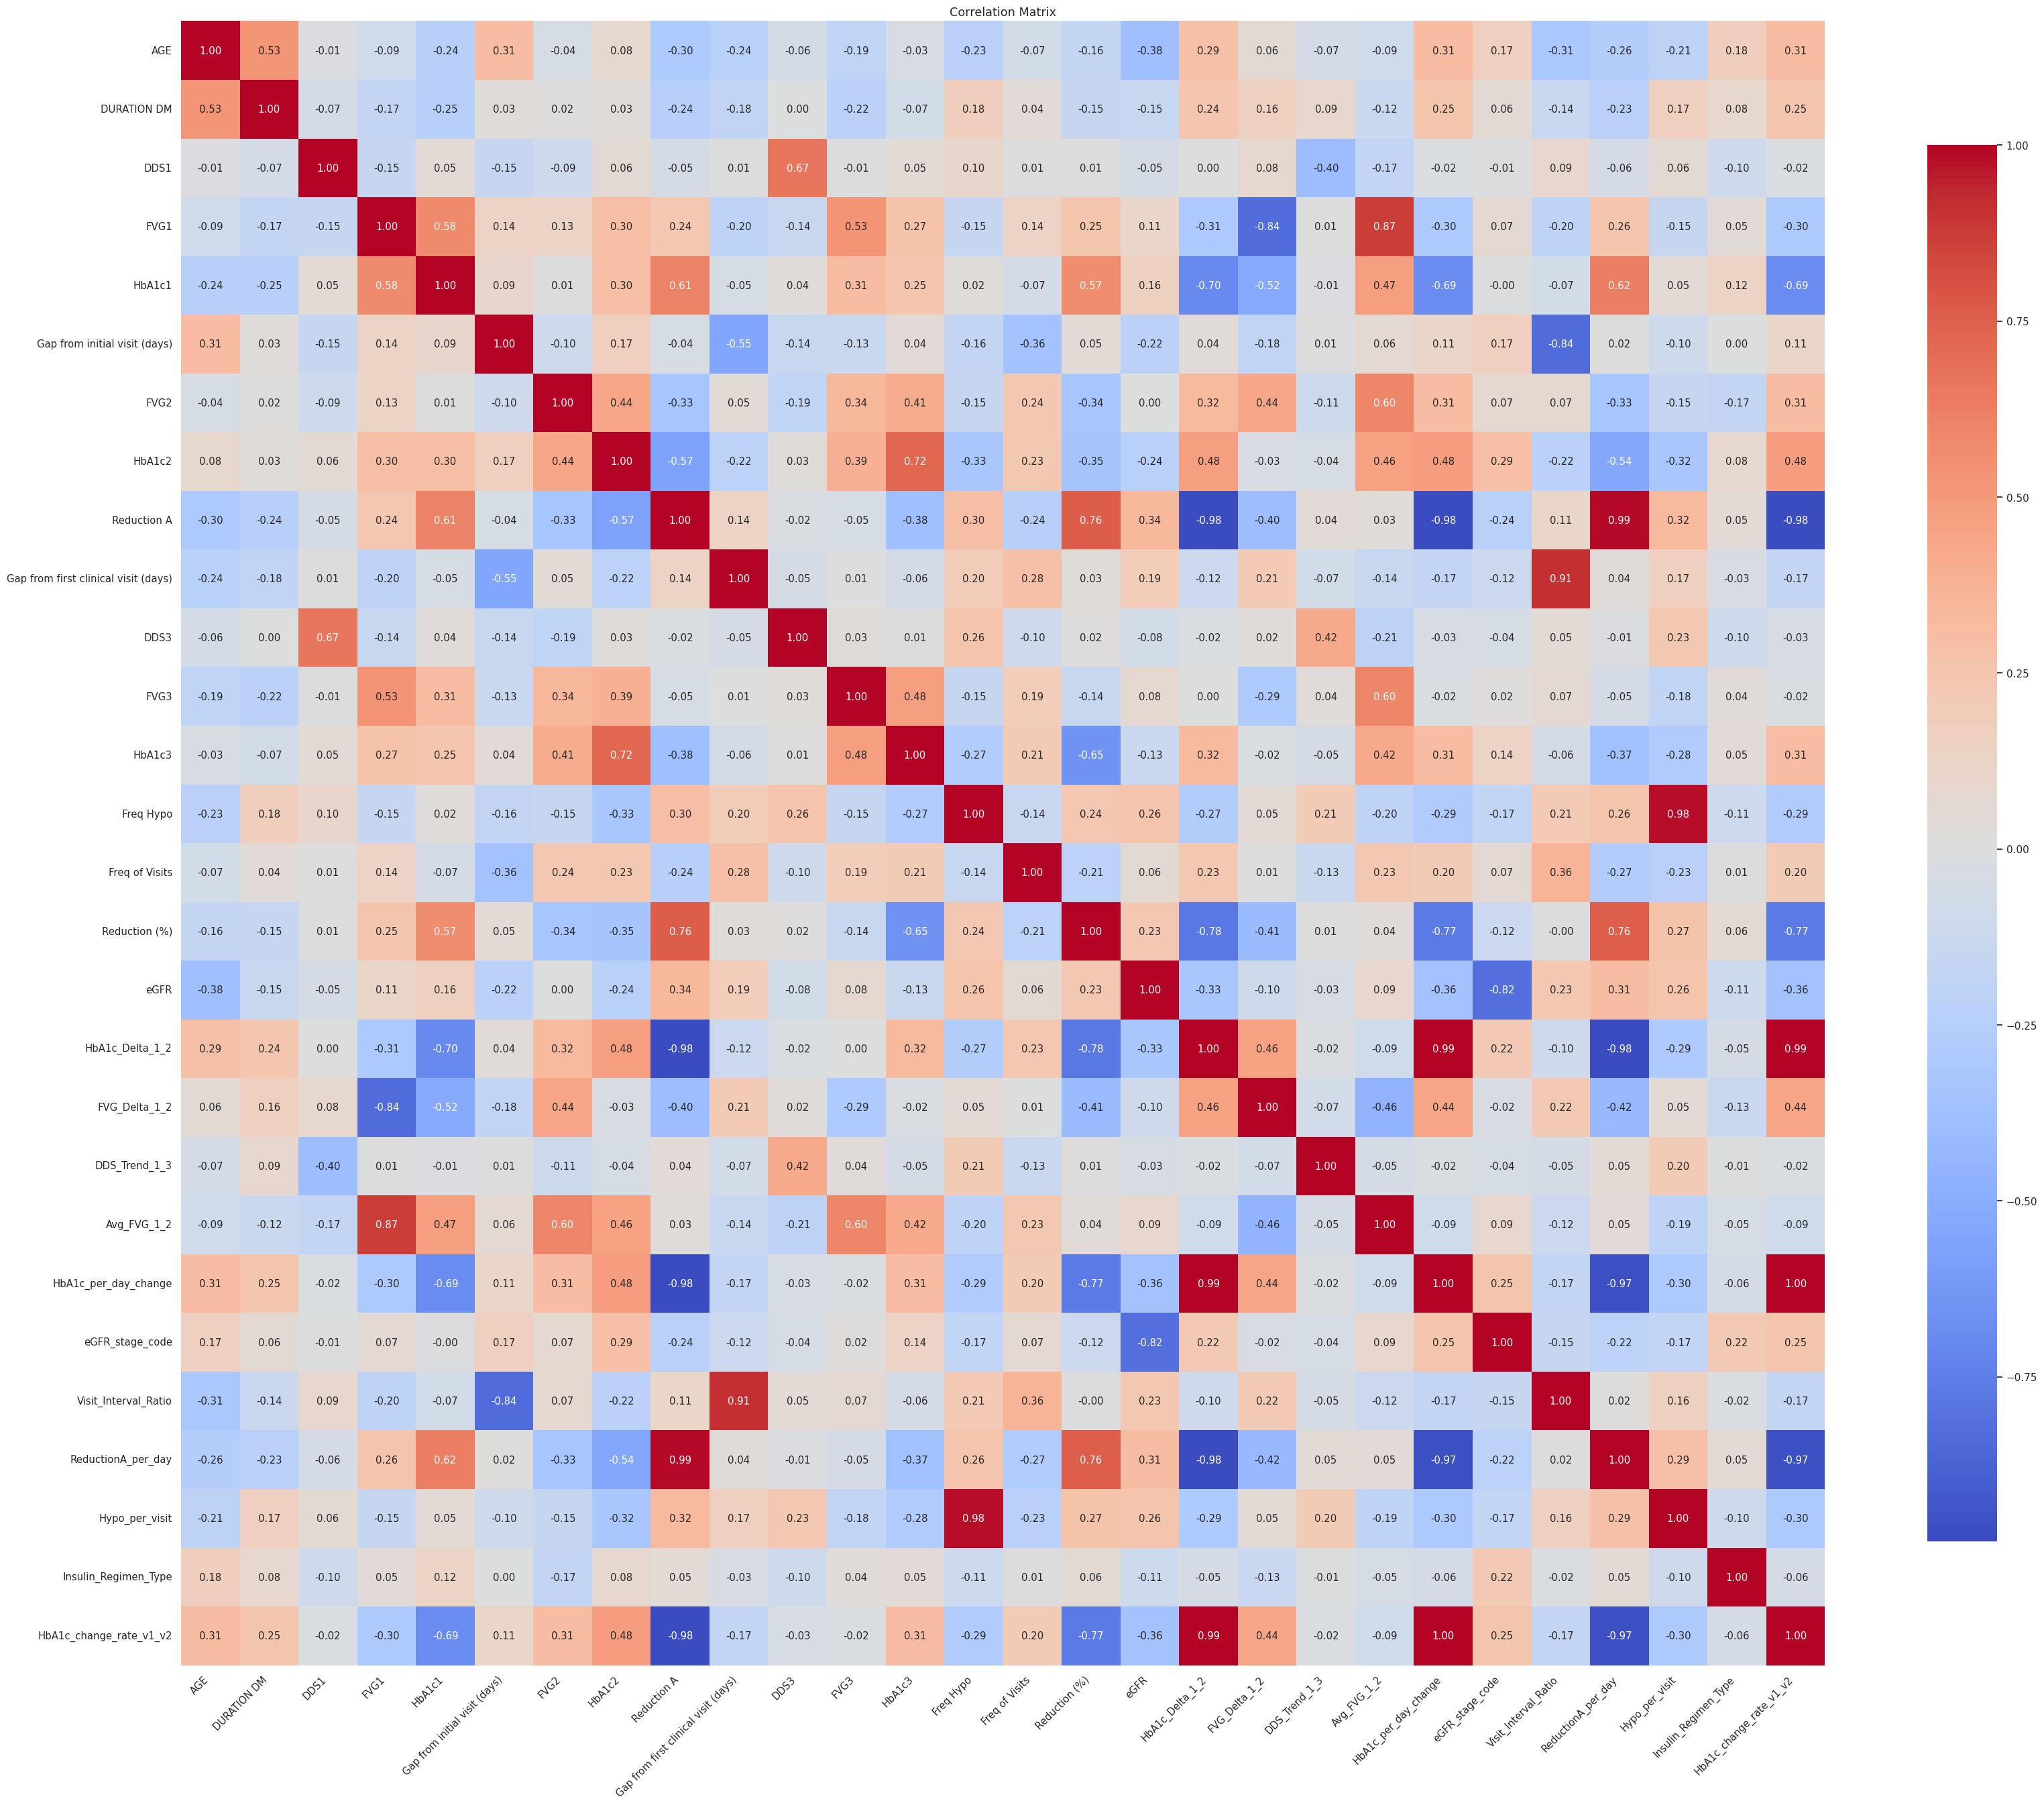

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "/content/dv3.csv"
df = pd.read_csv(DATA_PATH)

# correlations for numeric columns only
corr = df.select_dtypes(include=[np.number]).corr()

# Dynamic sizing & font scaling so numbers stay legible
n = len(corr)                            # number of variables
fig_w = 1.2 * n                          # width in inches
fig_h = 1.0 * n                          # height in inches
font_sz = max(6, min(12, 300 / n))       # clamp between 6–12 pt

# Draw heat-map
sns.set_theme(style="white")             # turn off the usual whitegrid
plt.figure(figsize=(fig_w, fig_h))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True, fmt=".2f",
    annot_kws={"size": font_sz},
    square=True,
    linewidths=0,
    cbar_kws={"shrink": 0.8},
)

plt.xticks(rotation=45, ha="right", fontsize=font_sz)
plt.yticks(rotation=0, fontsize=font_sz)
plt.title("Correlation Matrix", fontsize=font_sz + 2)
plt.tight_layout()
plt.show()


Text(0.5, 0, 'Pearson r')

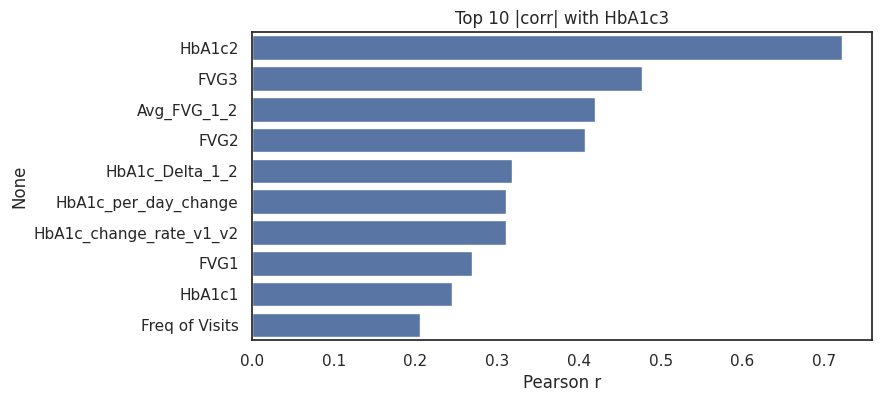

In [7]:
top_corr = corr[target].drop(target).sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 |corr| with HbA1c3"); plt.xlabel("Pearson r")

Text(0.5, 0, 'Pearson r')

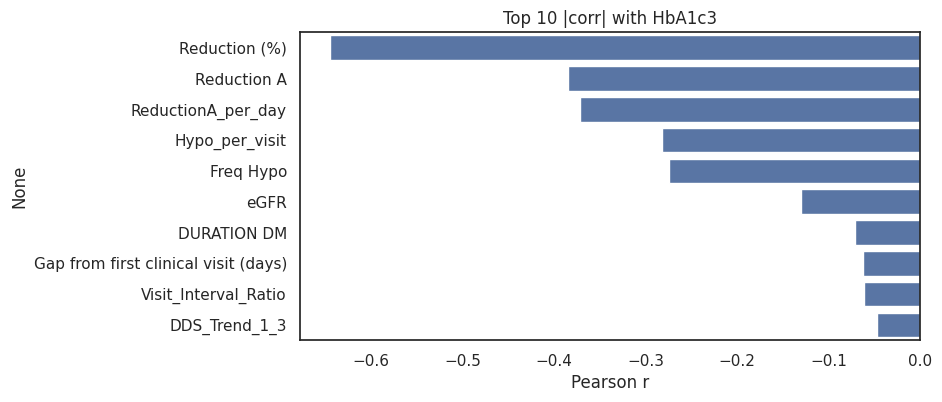

In [8]:
top_corr = corr[target].drop(target).sort_values(ascending=True).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title("Top 10 |corr| with HbA1c3"); plt.xlabel("Pearson r")


Text(0.5, 1.0, 'HbA1c3 vs. per-day change')

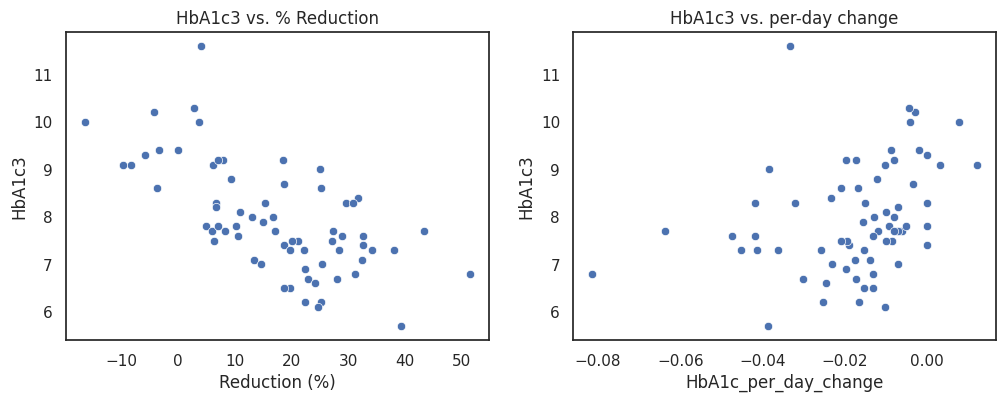

In [9]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.scatterplot(data=df, x="Reduction (%)", y=target, ax=ax[0])
ax[0].set_title("HbA1c3 vs. % Reduction")

sns.scatterplot(data=df, x="HbA1c_per_day_change", y=target, ax=ax[1])
ax[1].set_title("HbA1c3 vs. per-day change")


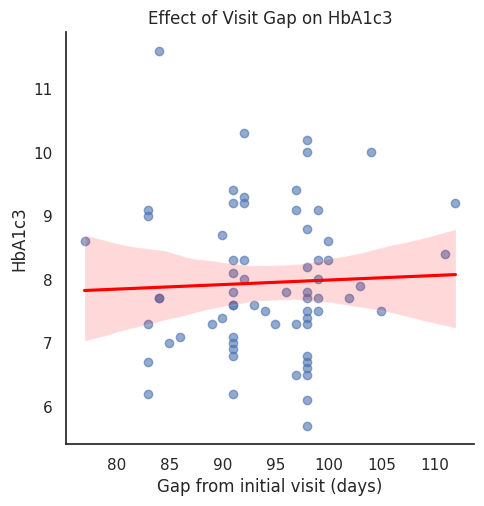

In [10]:
sns.lmplot(data=df, x="Gap from initial visit (days)", y=target,
           scatter_kws=dict(alpha=.6), line_kws=dict(color='red'))
plt.title("Effect of Visit Gap on HbA1c3");


28 numeric cols  ➜ ['AGE', 'DURATION DM', 'DDS1', 'FVG1', 'HbA1c1', 'Gap from initial visit (days)', 'FVG2', 'HbA1c2', 'Reduction A', 'Gap from first clinical visit (days)'] …
7 categorical cols ➜ ['GENDER', 'INSULIN REGIMEN', 'Date1', 'Date2', 'CKD Stage', 'Group', 'eGFR_stage_label'] …

▶ AGE


,count,mean,std,min,25%,50%,75%,max
AGE,67.0,42.656716,9.700909,21.0,36.5,42.0,48.0,66.0


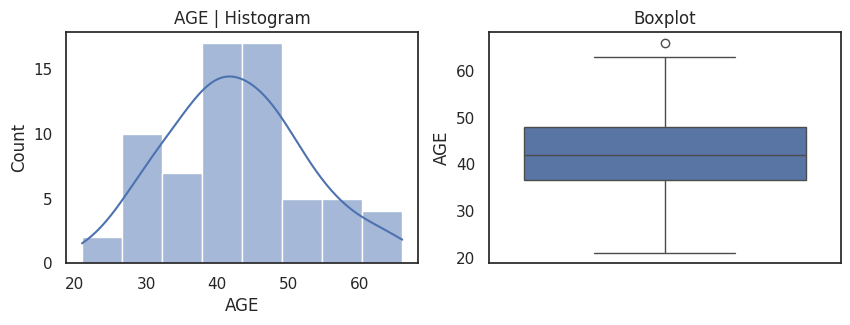


▶ DURATION DM


,count,mean,std,min,25%,50%,75%,max
DURATION DM,67.0,11.58209,5.627716,2.0,6.5,11.0,15.5,26.0


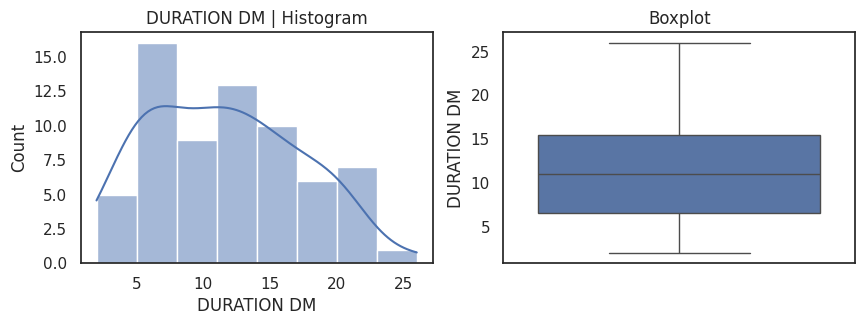


▶ DDS1


,count,mean,std,min,25%,50%,75%,max
DDS1,67.0,2.687761,0.932551,1.06,2.06,2.59,3.18,5.29


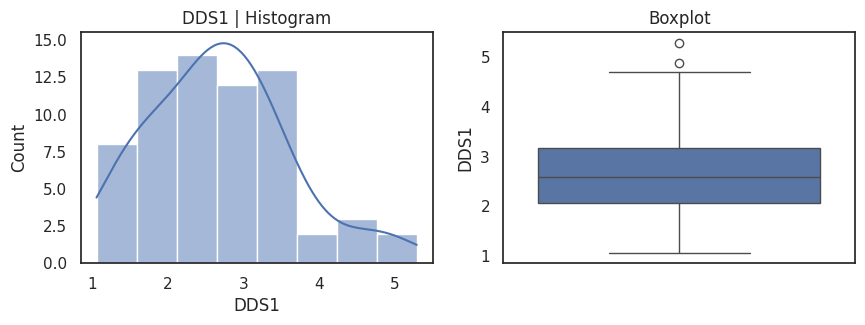


▶ FVG1


,count,mean,std,min,25%,50%,75%,max
FVG1,67.0,10.838806,4.252377,3.6,7.9,10.1,13.9,21.5


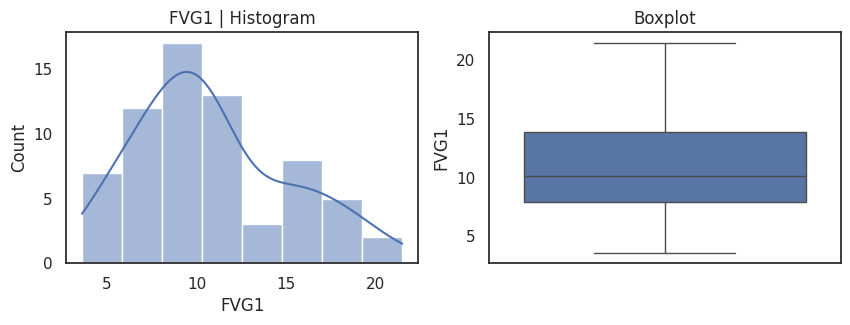


▶ HbA1c1


,count,mean,std,min,25%,50%,75%,max
HbA1c1,67.0,9.7,1.393383,8.0,8.65,9.4,10.55,14.0


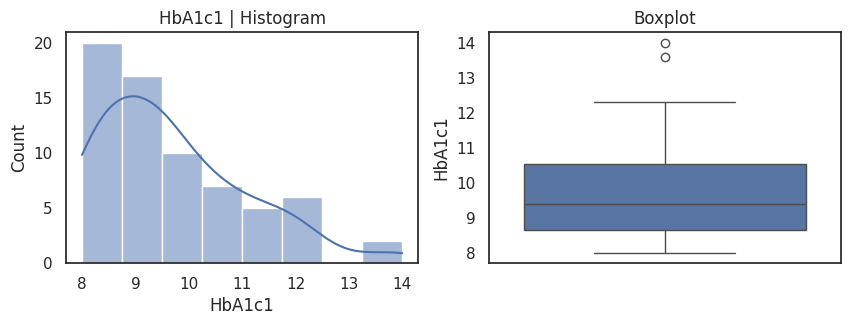


▶ Gap from initial visit (days)


,count,mean,std,min,25%,50%,75%,max
Gap from initial visit (days),67.0,94.089552,6.721137,77.0,91.0,95.0,98.0,112.0


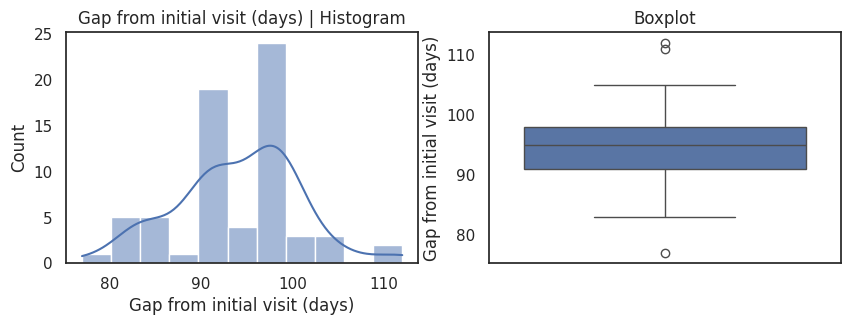


▶ FVG2


,count,mean,std,min,25%,50%,75%,max
FVG2,67.0,7.89403,2.602439,3.0,5.95,7.6,9.75,16.0


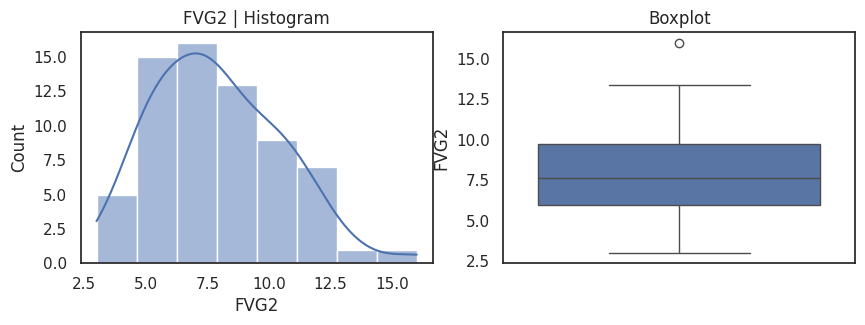


▶ HbA1c2


,count,mean,std,min,25%,50%,75%,max
HbA1c2,67.0,8.070149,1.141638,5.6,7.15,8.2,8.8,11.2


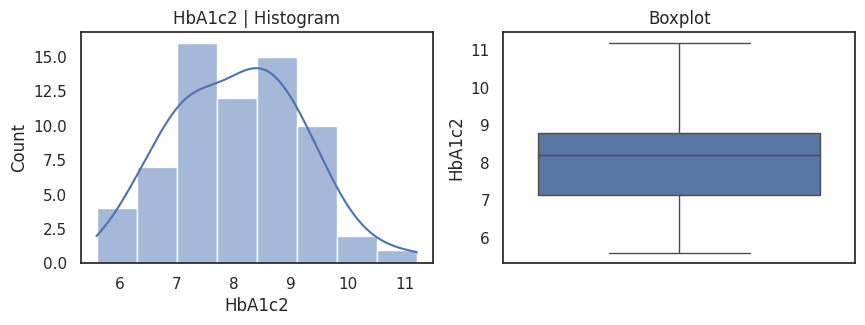


▶ Reduction A


,count,mean,std,min,25%,50%,75%,max
Reduction A,67.0,21.946269,22.103039,-10.8,8.85,16.7,29.45,112.1


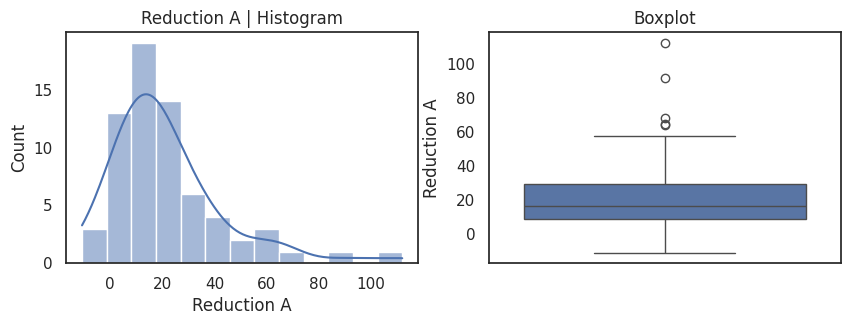


▶ Gap from first clinical visit (days)


,count,mean,std,min,25%,50%,75%,max
Gap from first clinical visit (days),67.0,86.731343,9.069733,70.0,83.0,84.0,91.0,113.0


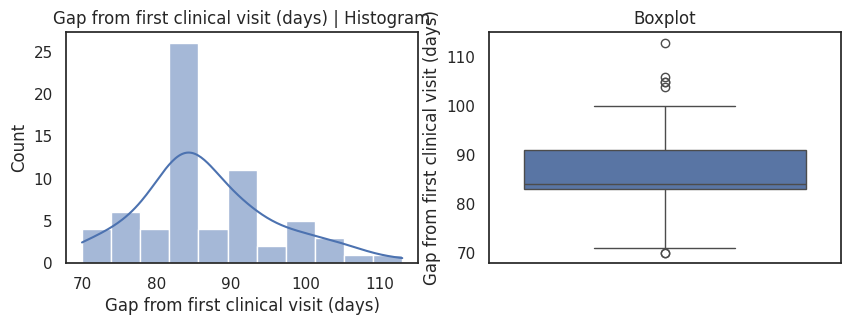


▶ DDS3


,count,mean,std,min,25%,50%,75%,max
DDS3,67.0,2.315522,0.944692,1.0,1.53,2.24,2.82,5.59


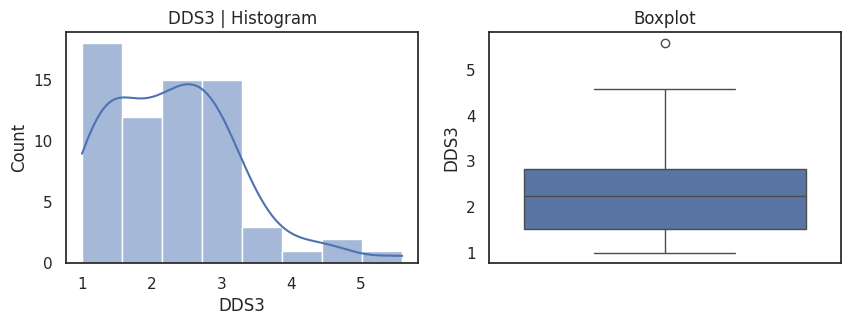


▶ FVG3


,count,mean,std,min,25%,50%,75%,max
FVG3,67.0,8.38209,3.020933,3.6,6.1,7.6,10.05,15.8


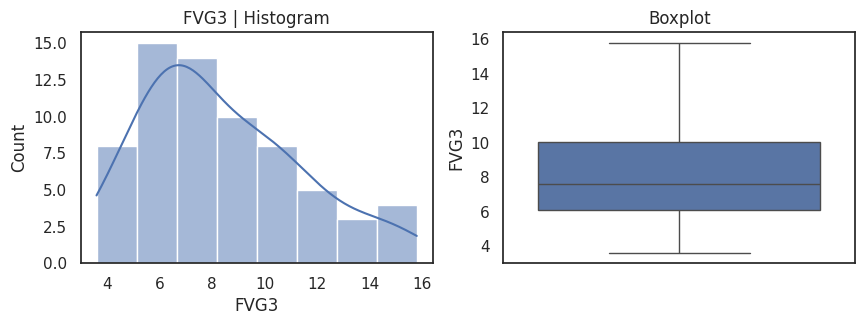


▶ HbA1c3


,count,mean,std,min,25%,50%,75%,max
HbA1c3,67.0,7.947761,1.141816,5.7,7.3,7.7,8.65,11.6


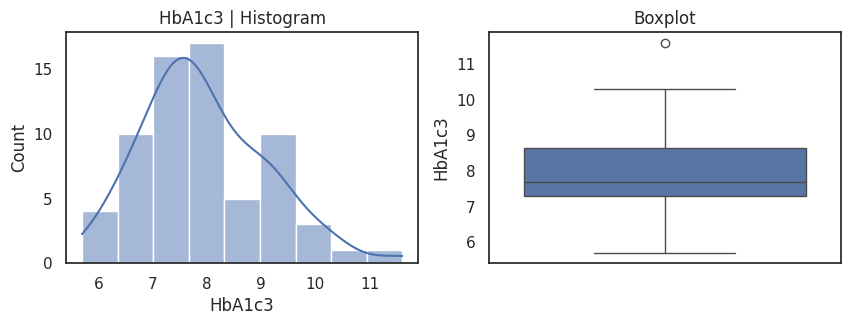


▶ Freq Hypo


,count,mean,std,min,25%,50%,75%,max
Freq Hypo,67.0,2.955224,5.541668,0.0,0.0,0.0,3.0,33.0


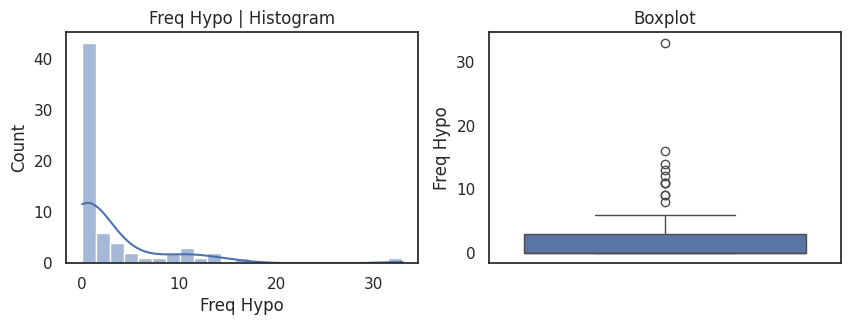


▶ Freq of Visits


,count,mean,std,min,25%,50%,75%,max
Freq of Visits,67.0,3.910448,1.055022,3.0,3.0,3.0,5.0,7.0


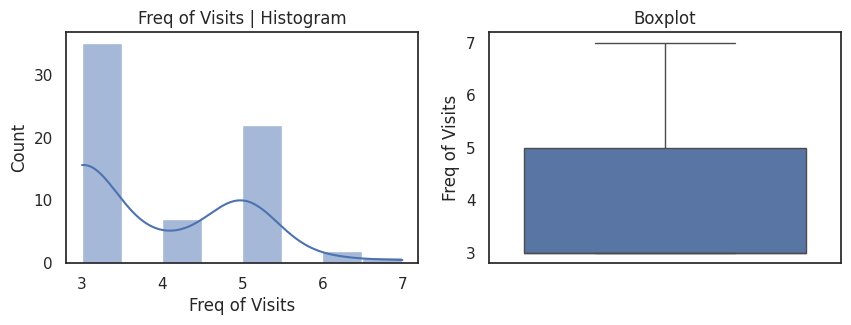


▶ Reduction (%)


,count,mean,std,min,25%,50%,75%,max
Reduction (%),67.0,16.976119,13.573672,-16.3,6.95,18.7,26.35,51.4


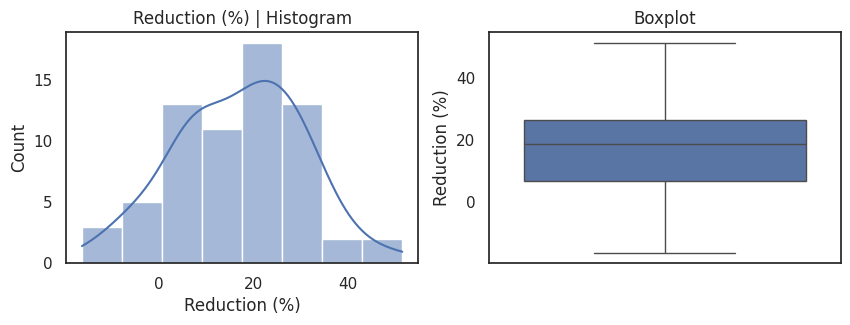


▶ eGFR


,count,mean,std,min,25%,50%,75%,max
eGFR,67.0,95.639552,28.391356,38.49,77.1,91.38,115.1,157.3


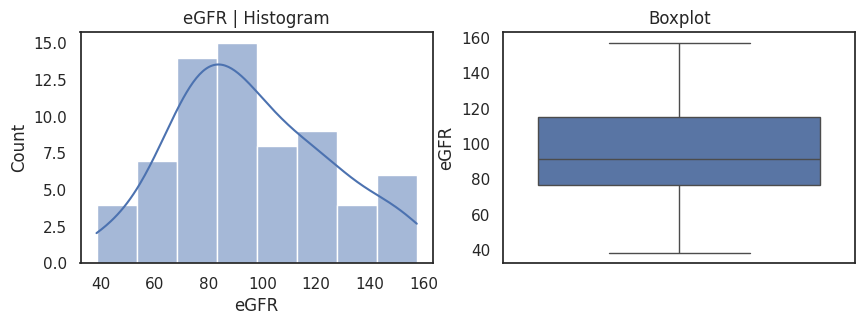


▶ HbA1c_Delta_1_2


,count,mean,std,min,25%,50%,75%,max
HbA1c_Delta_1_2,67.0,-1.629851,1.516676,-7.4,-2.15,-1.3,-0.75,1.0


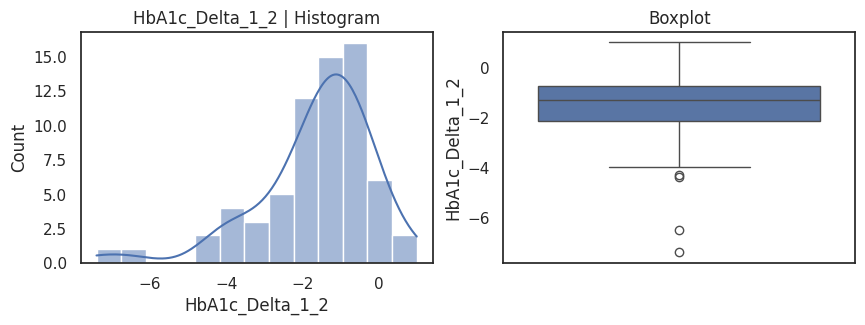


▶ FVG_Delta_1_2


,count,mean,std,min,25%,50%,75%,max
FVG_Delta_1_2,67.0,-2.944776,4.697236,-14.9,-5.95,-2.1,0.4,6.3


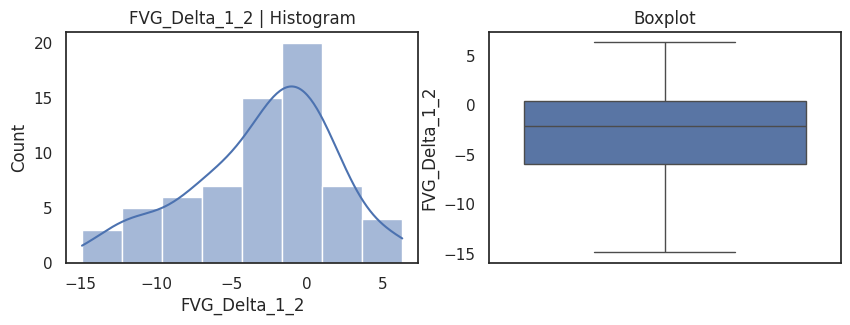


▶ DDS_Trend_1_3


,count,mean,std,min,25%,50%,75%,max
DDS_Trend_1_3,67.0,-0.372239,0.768037,-3.47,-0.67,-0.35,0.135,1.18


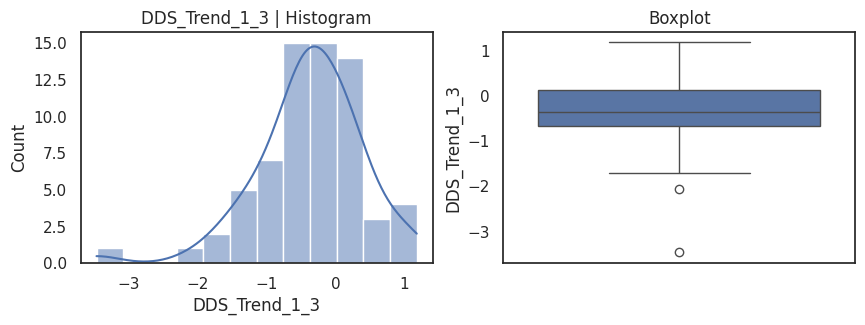


▶ Avg_FVG_1_2


,count,mean,std,min,25%,50%,75%,max
Avg_FVG_1_2,67.0,9.366418,2.62901,4.0,7.65,9.0,11.25,14.95


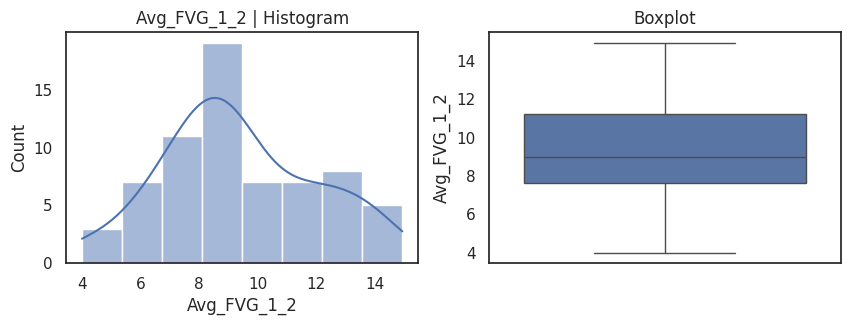


▶ HbA1c_per_day_change


,count,mean,std,min,25%,50%,75%,max
HbA1c_per_day_change,67.0,-0.017453,0.016234,-0.081319,-0.02325,-0.013953,-0.007589,0.012048


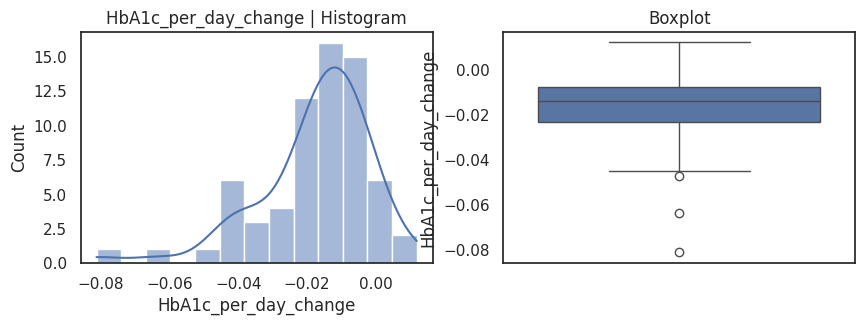


▶ eGFR_stage_code


,count,mean,std,min,25%,50%,75%,max
eGFR_stage_code,67.0,1.58209,0.741605,1.0,1.0,1.0,2.0,4.0


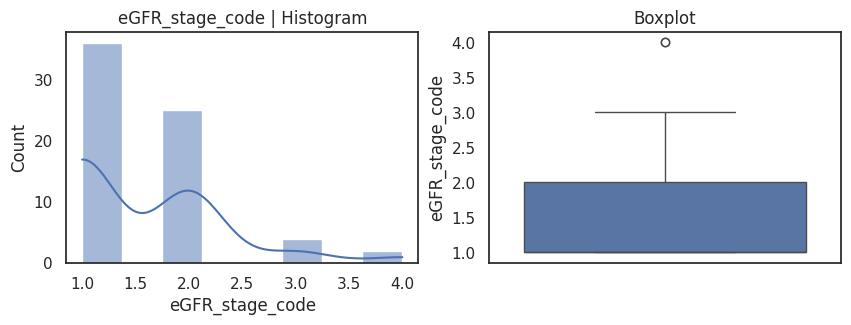


▶ Visit_Interval_Ratio


,count,mean,std,min,25%,50%,75%,max
Visit_Interval_Ratio,67.0,0.479101,0.038493,0.384615,0.457304,0.480874,0.502635,0.576531


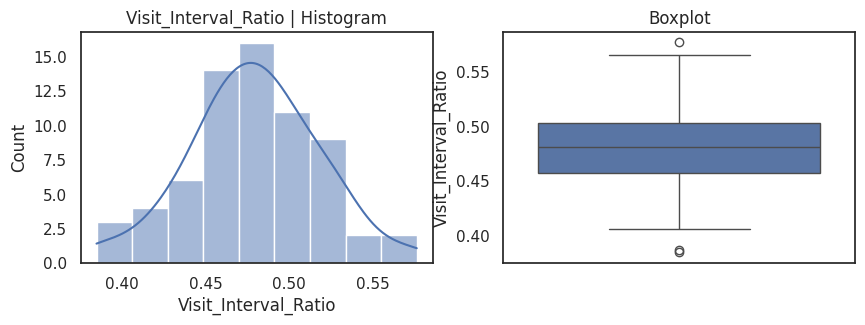


▶ ReductionA_per_day


,count,mean,std,min,25%,50%,75%,max
ReductionA_per_day,67.0,0.252061,0.258778,-0.128571,0.104252,0.186,0.348578,1.318824


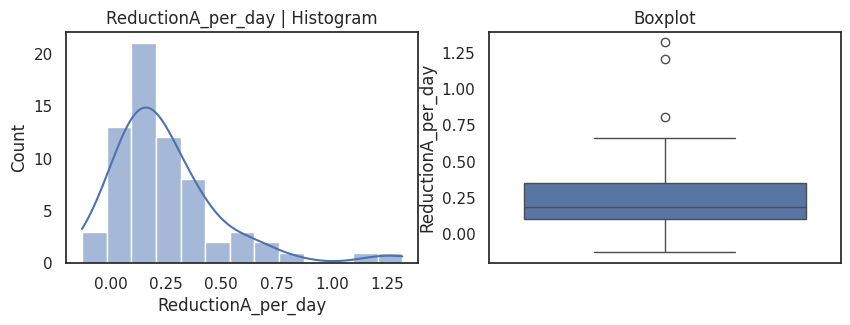


▶ Hypo_per_visit


,count,mean,std,min,25%,50%,75%,max
Hypo_per_visit,67.0,0.861194,1.738225,0.0,0.0,0.0,0.666667,11.0


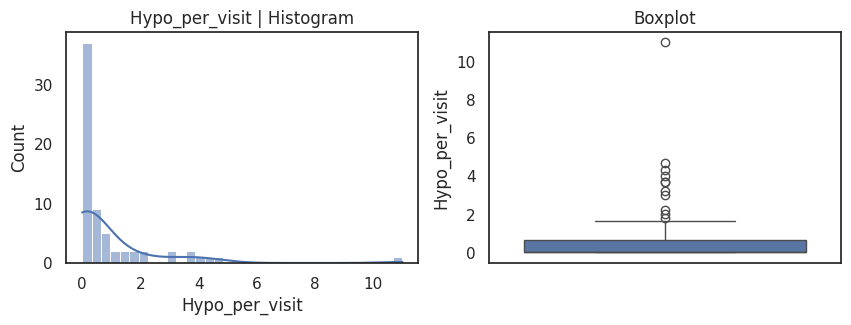


▶ Insulin_Regimen_Type


,count,mean,std,min,25%,50%,75%,max
Insulin_Regimen_Type,67.0,0.641791,0.829412,0.0,0.0,0.0,1.0,2.0


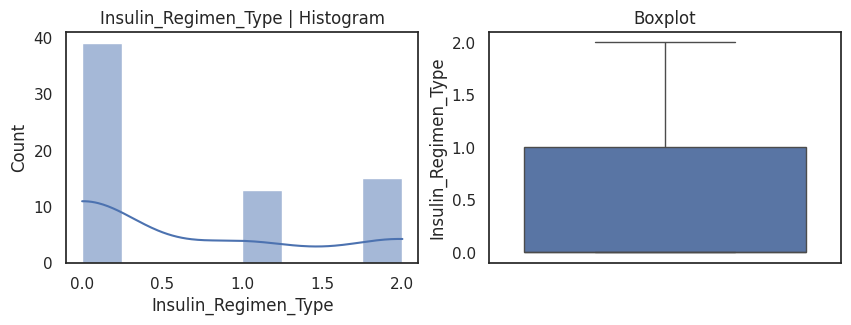


▶ HbA1c_change_rate_v1_v2


,count,mean,std,min,25%,50%,75%,max
HbA1c_change_rate_v1_v2,67.0,-0.017453,0.016234,-0.081319,-0.02325,-0.013953,-0.007589,0.012048


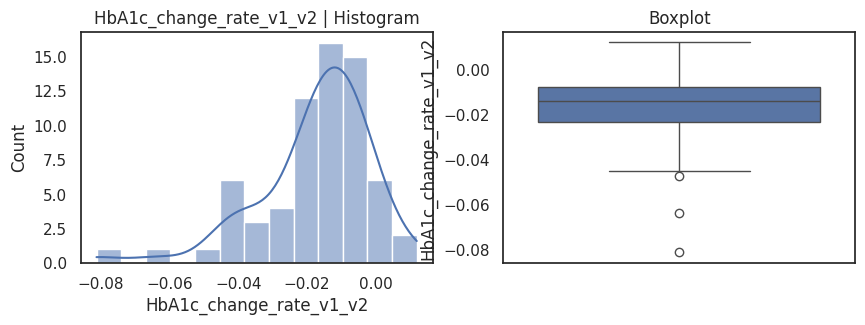

In [11]:
def numeric_univariate(col):
    print(f"\n▶ {col}")
    display(df[col].describe().to_frame().T)      # stats table

    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.histplot(df[col].dropna(), kde=True, ax=ax[0])
    ax[0].set_title(f"{col} | Histogram")
    sns.boxplot(y=df[col], ax=ax[1])
    ax[1].set_title("Boxplot")
    plt.show()

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"{len(num_cols)} numeric cols  ➜", num_cols[:10], "…")
print(f"{len(cat_cols)} categorical cols ➜", cat_cols[:10], "…")

# Run for ALL numeric columns
for c in num_cols:
    numeric_univariate(c)


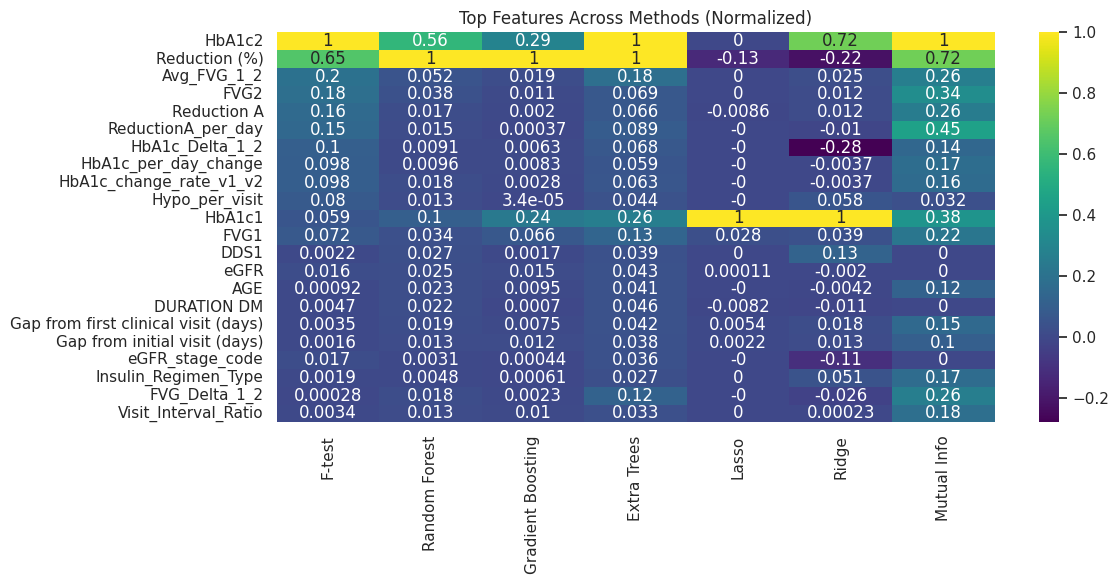

Random Forest R² using top 4 features: 0.644


In [12]:
# Install and import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import mutual_info_regression

#  Load the uploaded CSV
df = pd.read_csv("dv3.csv", encoding='ISO-8859-1')

#  Data Cleaning
df = df.dropna()

# Define predictors (X) and target (y)
y = df['HbA1c3']
X = df.drop(columns=[
    'HbA1c3', 'Group', 'DDS3', 'FVG3',
    'INSULIN REGIMEN', 'Date1', 'Date2', 'GENDER', 'CKD Stage', 'eGFR_stage_label'
])

#  1. Univariate F-test
uni = SelectKBest(score_func=f_regression, k='all')
uni.fit(X, y)
uni_scores = pd.Series(uni.scores_, index=X.columns)

#  2. Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=X.columns)

#  3. Lasso Regression
lasso = LassoCV(cv=5, random_state=42).fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

# 1. Gradient Boosting
gbm = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbm.fit(X, y)
gbm_imp = pd.Series(gbm.feature_importances_, index=X.columns)

# 2. Extra Trees
et = ExtraTreesRegressor(n_estimators=200, random_state=42)
et.fit(X, y)
et_imp = pd.Series(et.feature_importances_, index=X.columns)

# 3. Ridge Regression
ridge = RidgeCV(cv=5).fit(X, y)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

# 4. Mutual Information
mi = pd.Series(mutual_info_regression(X, y, random_state=42), index=X.columns)

# Combine all into DataFrame
feature_df = pd.DataFrame({
    'F-test': uni_scores,
    'Random Forest': rf_imp,
    'Gradient Boosting': gbm_imp,
    'Extra Trees': et_imp,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef,
    'Mutual Info': mi
}).dropna()

top_n = 10
top_features = pd.concat([
    feature_df['F-test'].nlargest(top_n),
    feature_df['Random Forest'].nlargest(top_n),
    feature_df['Lasso'].abs().nlargest(top_n),
    feature_df['Ridge'].abs().nlargest(top_n),
    feature_df['Gradient Boosting'].nlargest(top_n),
    feature_df['Extra Trees'].nlargest(top_n),
    feature_df['Mutual Info'].nlargest(top_n),
]).index.unique()

filtered_df = feature_df.loc[top_features]

# Normalize for comparison
normalized_df = filtered_df.copy()
for col in normalized_df.columns:
    max_val = normalized_df[col].abs().max()
    if max_val != 0:
        normalized_df[col] = normalized_df[col] / max_val

# Heatmap of top features
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_df, annot=True, cmap='viridis', linewidths=0)
plt.title("Top Features Across Methods (Normalized)")
plt.tight_layout()
plt.show()

#  Cross-validation using top 5 features from Random Forest
top4_rf = rf_imp.nlargest(5).index.tolist()
rf_score = cross_val_score(rf, X[top4_rf], y, cv=5, scoring='r2').mean()
print(f"Random Forest R² using top 4 features: {rf_score:.3f}")


In [13]:
# Install and import dependencies
import pandas as pd
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LassoCV, RidgeCV

#  Load the uploaded CSV
df = pd.read_csv("dv3.csv", encoding='ISO-8859-1')

#  Data Cleaning
df = df.dropna()

#  Define predictors (X) and target (y)
y = df['HbA1c3']
X = df.drop(columns=[
    'HbA1c3', 'Group', 'DDS3', 'FVG3',
    'INSULIN REGIMEN', 'Date1', 'Date2', 'GENDER', 'CKD Stage', 'eGFR_stage_label'
])

#  Feature Scoring
uni = SelectKBest(score_func=f_regression, k='all')
uni.fit(X, y)
uni_scores = pd.Series(uni.scores_, index=X.columns)

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X, y)
rf_imp = pd.Series(rf.feature_importances_, index=X.columns)

lasso = LassoCV(cv=5, random_state=42).fit(X, y)
lasso_coef = pd.Series(lasso.coef_, index=X.columns)

gbm = GradientBoostingRegressor(n_estimators=200, random_state=42)
gbm.fit(X, y)
gbm_imp = pd.Series(gbm.feature_importances_, index=X.columns)

et = ExtraTreesRegressor(n_estimators=200, random_state=42)
et.fit(X, y)
et_imp = pd.Series(et.feature_importances_, index=X.columns)

ridge = RidgeCV(cv=5).fit(X, y)
ridge_coef = pd.Series(ridge.coef_, index=X.columns)

mi = pd.Series(mutual_info_regression(X, y, random_state=42), index=X.columns)

# Combine results
feature_df = pd.DataFrame({
    'F-test': uni_scores,
    'Random Forest': rf_imp,
    'Gradient Boosting': gbm_imp,
    'Extra Trees': et_imp,
    'Lasso': lasso_coef,
    'Ridge': ridge_coef,
    'Mutual Info': mi
}).dropna()

#  Display top N features from each method
top_n = 10
print("\n=== Top Features by Method ===\n")

for method in feature_df.columns:
    print(f"\n▶ {method} (Top {top_n})")
    print(feature_df[method].abs().sort_values(ascending=False).head(top_n).to_string())

#  Evaluate Random Forest using its top 5 features
top5_rf = rf_imp.nlargest(5).index.tolist()
rf_score = cross_val_score(rf, X[top5_rf], y, cv=5, scoring='r2').mean()
print(f"\n Random Forest R² using top 5 features: {rf_score:.3f}")



=== Top Features by Method ===


▶ F-test (Top 10)
HbA1c2                     70.871209
Reduction (%)              46.391882
Avg_FVG_1_2                13.867547
FVG2                       12.962489
Reduction A                11.290136
ReductionA_per_day         10.392105
HbA1c_Delta_1_2             7.325617
HbA1c_change_rate_v1_v2     6.935947
HbA1c_per_day_change        6.935947
Hypo_per_visit              5.640761

▶ Random Forest (Top 10)
Reduction (%)    0.481371
HbA1c2           0.270652
HbA1c1           0.050160
Avg_FVG_1_2      0.024813
FVG2             0.018298
FVG1             0.016476
DDS1             0.012977
eGFR             0.011816
AGE              0.011244
DURATION DM      0.010763

▶ Gradient Boosting (Top 10)
Reduction (%)                    0.584458
HbA1c2                           0.170854
HbA1c1                           0.139432
FVG1                             0.038706
Avg_FVG_1_2                      0.010946
eGFR                             0.008611
Gap from i

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Load dataset
df = pd.read_csv("dv3.csv", encoding='ISO-8859-1')
df = df.dropna()

# 2. Define target and final selected features
target = 'HbA1c3'
top_features = [
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
]

# 3. Prepare training data
X = df[top_features]
y = df[target]

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train a Random Forest model
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# 7. Output results
print(" Model Trained with Top Features")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")

# 8. Optional: Cross-validation score for robustness
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
print(f"Cross-Validated R²: {cv_r2:.3f}")


 Model Trained with Top Features
R² Score: 0.848
Mean Absolute Error (MAE): 0.358
Cross-Validated R²: 0.632


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
)
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load and prepare data
df = pd.read_csv("dv3.csv", encoding='ISO-8859-1')
df = df.dropna()

# 2. Define target and top features
target = 'HbA1c3'
top_features = [
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
]

X = df[top_features]
y = df[target]

# 3. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Define models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=200, random_state=42),
    "Lasso": LassoCV(cv=5, random_state=42),
    "Ridge": RidgeCV(cv=5),
    "SVR (RBF Kernel)": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf'))
    ]),
    "K-Nearest Neighbors": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
    ])
}

# 5. Train & evaluate each model
print(" Model Evaluation on Top Features\n")
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()

    results.append({
        'Model': name,
        'R2 Score': round(r2, 3),
        'MAE': round(mae, 3),
        'Cross-Val R2': round(cv_r2, 3)
    })

# 6. Display results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print(results_df.to_string(index=False))


 Model Evaluation on Top Features

              Model  R2 Score   MAE  Cross-Val R2
              Lasso     0.991 0.090         0.949
              Ridge     0.991 0.092         0.959
  Gradient Boosting     0.910 0.287         0.739
      Random Forest     0.848 0.358         0.632
        Extra Trees     0.842 0.388         0.723
   SVR (RBF Kernel)     0.787 0.333         0.690
K-Nearest Neighbors     0.657 0.544         0.536


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Load and prepare data
df = pd.read_csv("dv3.csv", encoding='ISO-8859-1')
df = df.dropna()

top_features = [
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
]
X = df[top_features]
y = df['HbA1c3']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 2. Define parameter grids
param_grids = {
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    "SVR (RBF)": {
        'svr__C': [0.5, 1.0, 10],
        'svr__gamma': ['scale', 0.1, 1]
    },
    "Ridge": {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    "Lasso": {
        'alpha': [0.01, 0.1, 1.0, 10.0]
    },
    "KNN": {
        'knn__n_neighbors': [3, 5, 7, 9]
    }
}

# 3. Define model pipelines
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR (RBF)": Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR())
    ]),
    "Ridge": Ridge(),
    "Lasso": Lasso(max_iter=10000),
    "KNN": Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsRegressor())
    ])
}

# 4. Perform GridSearchCV
results = []
for name, model in models.items():
    print(f" Tuning {name}...")
    gs = GridSearchCV(model, param_grids[name], cv=5, scoring='r2', n_jobs=-1)
    gs.fit(X_train, y_train)

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    results.append({
        'Model': name,
        'Best Params': gs.best_params_,
        'R2 Score': round(r2, 3),
        'MAE': round(mae, 3)
    })

# 5. Display results
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
print("\n Tuned Model Results")
print(results_df.to_string(index=False))


 Tuning Random Forest...
 Tuning Gradient Boosting...
 Tuning SVR (RBF)...
 Tuning Ridge...
 Tuning Lasso...
 Tuning KNN...

 Tuned Model Results
            Model                                                      Best Params  R2 Score   MAE
            Lasso                                                  {'alpha': 0.01}     0.991 0.090
            Ridge                                                   {'alpha': 0.1}     0.991 0.092
Gradient Boosting     {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}     0.915 0.282
        SVR (RBF)                                {'svr__C': 10, 'svr__gamma': 0.1}     0.908 0.214
    Random Forest {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}     0.848 0.358
              KNN                                          {'knn__n_neighbors': 5}     0.657 0.544


In [17]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import joblib

# 1. Define Ridge parameter grid
param_grid_ridge = {
    'alpha': [0.1]
}

# 2. Create and fit GridSearchCV for Ridge
ridge_model = Ridge()
gs_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
gs_ridge.fit(X_train, y_train)

# 3. Save the best Ridge model
joblib.dump(gs_ridge.best_estimator_, "ridge_best_model.pkl")
print(" Ridge model saved to 'ridge_best_model.pkl'")


 Ridge model saved to 'ridge_best_model.pkl'


In [18]:
import joblib

# Load the saved model
model = joblib.load("ridge_best_model.pkl")
print(" Model loaded successfully")


 Model loaded successfully


In [19]:
import pandas as pd

# Input values in the exact order of features
#column 13
input_data = pd.DataFrame([[
    6.2,   # HbA1c2
    8.3,   # HbA1c1
    7.9,   # FVG1
    6.6,   # FVG2
    7.25,  # Avg_FVG_1_2
    25.3,   # Reduction (%)

]], columns=[
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
])

# Make prediction
prediction = model.predict(input_data)
print(f"Predicted HbA1c3: {prediction[0]:.2f}")


Predicted HbA1c3: 6.05


In [20]:
import pandas as pd
#unseen data
# Input values in the exact order of features
#column 33
input_data = pd.DataFrame([[
    8,   # HbA1c2
    8.3,   # HbA1c1
    8.3,   # FVG1
    6.8,   # FVG2
    7.55,  # Avg_FVG_1_2
    3.7,   # Reduction (%)

]], columns=[
    'HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)'
])

# Make prediction
prediction = model.predict(input_data)
print(f"Predicted HbA1c3: {prediction[0]:.2f}")


Predicted HbA1c3: 8.20


In [21]:
import pandas as pd
import joblib
from sklearn.metrics import mean_absolute_error

# 1. Load the trained Ridge model
model = joblib.load('ridge_best_model.pkl')

# 2. Define trained feature set
trained_features = ['HbA1c2', 'HbA1c1', 'FVG1', 'FVG2', 'Avg_FVG_1_2',
    'Reduction (%)']

# 3. Load dataset
df = pd.read_csv('dv3.csv')

# 4. Prepare features and true labels
X = df[trained_features]
y_true = df['HbA1c3']

# 5. Predict
y_pred = model.predict(X)

# 6. Evaluate performance
mae = mean_absolute_error(y_true, y_pred)
print(" Prediction complete.")
print(f" Mean Absolute Error (MAE): {mae:.4f}")

# 7. Save predictions
df["HbA1c3_Predicted"] = y_pred
df.to_csv("dv3_with_predictions.csv", index=False)
print(" Predictions saved to 'dv3_with_predictions.csv'")


 Prediction complete.
 Mean Absolute Error (MAE): 0.1361
 Predictions saved to 'dv3_with_predictions.csv'
